In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

#### Relationship between numpy and torch

In [2]:
x_numpy=np.array([0.1,0.2,0.3])
x_torch=torch.tensor([0.1,0.2,0.3])

In [3]:
torch.from_numpy(x_numpy)

tensor([0.1000, 0.2000, 0.3000], dtype=torch.float64)

In [4]:
x_torch.numpy()

array([0.1, 0.2, 0.3], dtype=float32)

In [5]:
y_numpy=x_torch.numpy()

修改了y_numpy以后，x_torch也会被修改

In [8]:
y_numpy[0]=0.1

In [9]:
x_torch

tensor([0.1000, 0.2000, 0.3000])

In [10]:
y_torch=torch.from_numpy(x_numpy)

In [11]:
y_torch

tensor([0.1000, 0.2000, 0.3000], dtype=torch.float64)

In [12]:
torch.mean(x_torch,dim=0).reshape(-1,1)

tensor([[0.2000]])

In [13]:
N,C,W,H=10000,3,28,28
x=torch.randn((N,C,W,H))

In [14]:
x.shape

torch.Size([10000, 3, 28, 28])

In [15]:
x.view(N,C,-1).shape

torch.Size([10000, 3, 784])

In [16]:
x.view(-1,C,784).shape # -1表示自动调整大小，只能出现一次

torch.Size([10000, 3, 784])

In [17]:
x=torch.empty(5,1,4,1)
y=torch.empty(3,1,1)
print((x+y).shape) # 短的和长的要能对齐（某一维度一样）

torch.Size([5, 3, 4, 1])


#### device

In [18]:
cpu=torch.device("cpu")
gpu=torch.device("cuda")

x=torch.rand(10)
print(x)
x=x.to(gpu)# 会显示device="cuda:0"
print(x)
x=x.to(cpu)
print(x)

tensor([0.0568, 0.6882, 0.6522, 0.7559, 0.2006, 0.6792, 0.8313, 0.9482, 0.7418,
        0.5824])
tensor([0.0568, 0.6882, 0.6522, 0.7559, 0.2006, 0.6792, 0.8313, 0.9482, 0.7418,
        0.5824], device='cuda:0')
tensor([0.0568, 0.6882, 0.6522, 0.7559, 0.2006, 0.6792, 0.8313, 0.9482, 0.7418,
        0.5824])


#### auto gradient mechanism

In [19]:
a=torch.tensor(2.0,requires_grad=True)
b=torch.tensor(1.0,requires_grad=True)

In [20]:
c=a+b
d=b+1
e=c*d

In [21]:
c

tensor(3., grad_fn=<AddBackward0>)

In [22]:
def f(x):
    return (x-2)**2

def fp(x):
    return 2*(x-2)

x=torch.tensor([[1.0]],requires_grad=True)
y=f(x)
y.backward()

In [23]:
fp(x)

tensor([[-2.]], grad_fn=<MulBackward0>)

In [24]:
x.grad #自动求导，只能对一个标量（赋值）

tensor([[-2.]])

In [25]:
def g(w):
    return 2*w[0]*w[1]+w[1]*torch.cos(w[0])

def grad_g(w):
    return torch.tensor([2*w[1]-w[1]*torch.sin(w[0]),2*w[0]+torch.cos(w[0])])

w=torch.tensor([np.pi,1],requires_grad=True)
z=g(w)
z.backward()

In [26]:
grad_g(w)

tensor([2.0000, 5.2832])

In [27]:
w.grad

tensor([2.0000, 5.2832])

In [28]:
x=torch.tensor([5.0],requires_grad=True)
step_size=0.25

print('iter,\tx,\tf(x),\tf\'(x),\tf\'(x)pytorch')
for i in range(15):
    y=f(x)
    y.backward()
    
    print('{},\t{:.3f},\t{:.3f},\t{:.3f},\t{:.3f}'.format(i,x.item(),f(x).item(),fp(x).item(),x.grad.item()))
    x.data=x.data-step_size*x.grad
    
    x.grad.detach()# for efficiency
    x.grad.zero_()# necessary after backward

iter,	x,	f(x),	f'(x),	f'(x)pytorch
0,	5.000,	9.000,	6.000,	6.000
1,	3.500,	2.250,	3.000,	3.000
2,	2.750,	0.562,	1.500,	1.500
3,	2.375,	0.141,	0.750,	0.750
4,	2.188,	0.035,	0.375,	0.375
5,	2.094,	0.009,	0.188,	0.188
6,	2.047,	0.002,	0.094,	0.094
7,	2.023,	0.001,	0.047,	0.047
8,	2.012,	0.000,	0.023,	0.023
9,	2.006,	0.000,	0.012,	0.012
10,	2.003,	0.000,	0.006,	0.006
11,	2.001,	0.000,	0.003,	0.003
12,	2.001,	0.000,	0.001,	0.001
13,	2.000,	0.000,	0.001,	0.001
14,	2.000,	0.000,	0.000,	0.000


#### Linear Regression

In [50]:
torch.manual_seed(446)
np.random.seed(446)

In [51]:
d=2
n=50
X=torch.randn(n,d)
true_w=torch.tensor([[-1.0],[2.0]])
y=X@true_w+torch.randn(n,1)*0.1

In [52]:
X.shape

torch.Size([50, 2])

In [53]:
y.shape

torch.Size([50, 1])

In [54]:
true_w.shape

torch.Size([2, 1])

In [55]:
def model(X,w):
    return X@w

def rss(y,y_hat):
    return torch.norm(y-y_hat)**2/n# n is the batch size of the data

def grad_rss(X,y,w):
    return -2*X.t()@(y-X@w)/n

w=torch.tensor([[1.],[0]],requires_grad=True)
y_hat=model(X,w)

loss=rss(y,y_hat)
loss.backward()


print(grad_rss(X,y,w).detach().view(2).numpy())
print(w.grad.view(2).numpy())

[ 2.9760215 -4.0282674]
[ 2.976021 -4.028267]


In [56]:
# simulate a training process
step_size=0.1
print('iter,\tloss,\tw')

for i in range(20):
    y_hat=model(X,w)
    loss=rss(y,y_hat)
    
    loss.backward()
    w.data=w.data-step_size-w.grad
    print('{},\t{:.2f},\t{}'.format(i,loss.item(),w.view(2).detach().numpy()))
    
    w.grad.detach()
    w.grad.zero_()

print('\ntrue w\t\t',true_w.view(2).numpy())
print('estimated w\t',w.view(2).detach().numpy())

iter,	loss,	w
0,	6.98,	[-5.052042  7.956534]
1,	48.27,	[ 1.0640731 -4.087434 ]
2,	39.94,	[-2.4118748  7.8159194]
3,	35.17,	[-0.05402446 -3.7542849 ]
4,	33.19,	[-1.917684  7.414932]
5,	29.71,	[-0.2916336 -3.3360138]
6,	28.28,	[-1.7863961  6.999636 ]
7,	25.24,	[-0.37809813 -2.9315844 ]
8,	24.11,	[-1.7195556  6.6089177]
9,	21.45,	[-0.43567085 -2.5553722 ]
10,	20.55,	[-1.6669669  6.247188 ]
11,	18.23,	[-0.48507404 -2.207777  ]
12,	17.52,	[-1.6199683  5.913259 ]
13,	15.49,	[-0.5300306 -1.8870125]
14,	14.94,	[-1.5768633  5.6051545]
15,	13.16,	[-0.5714023 -1.5910735]
16,	12.74,	[-1.5371386  5.3209047]
17,	11.18,	[-0.6095524 -1.3180504]
18,	10.87,	[-1.5004973  5.0586643]
19,	9.50,	[-0.6447455 -1.0661688]

true w		 [-1.  2.]
estimated w	 [-0.6447455 -1.0661688]


#### Linear Module

In [156]:
d_in=3
d_out=4
linear_model=nn.Linear(d_in,d_out)

example_tensor=torch.tensor([[1.,2,3],[4,5,6]])

transformed=linear_model(example_tensor)

In [162]:
linear_model.weight.shape

torch.Size([4, 3])

#### activation function

In [57]:
activation_fn=nn.ReLU()
example_tensor=torch.tensor([[-1.,2,3],[4,5,6]])
activated=activation_fn(example_tensor)

In [58]:
activated # change -1 to 0

tensor([[0., 2., 3.],
        [4., 5., 6.]])

#### Sequential model

In [59]:
d_in=3
d_hidden=4
d_out=1

model=torch.nn.Sequential(
                        nn.Linear(d_in,d_hidden),
                        nn.Tanh(),
                        nn.Linear(d_hidden,d_out),
                        nn.Sigmoid()
                          )

In [60]:
example_tensor=torch.tensor([[1.,2,3],[4,5,6]])

In [61]:
transformed=model(example_tensor)

In [62]:
transformed.shape

torch.Size([2, 1])

In [63]:
params=model.parameters()

In [179]:
for param in params:
    print(param)

Parameter containing:
tensor([[-0.5539,  0.0364, -0.4650],
        [-0.4662,  0.0338, -0.2728],
        [ 0.1478, -0.2755, -0.0718],
        [-0.5078,  0.1323, -0.2988]], requires_grad=True)
Parameter containing:
tensor([-0.4033, -0.1532, -0.2354,  0.3323], requires_grad=True)
Parameter containing:
tensor([[-0.4727, -0.1513,  0.0043, -0.1086]], requires_grad=True)
Parameter containing:
tensor([0.2801], requires_grad=True)


#### Loss functions

In [64]:
mse_loss_fn=nn.MSELoss()

in_=torch.tensor([[0.,0,0]])
target=torch.tensor([[1.,0,-1]])

loss=mse_loss_fn(in_,target)
print(loss)

tensor(0.6667)


#### torch.optim()

In [65]:
# create a simple model
model = nn.Linear(1, 1)

# create a simple dataset
X_simple = torch.tensor([[1.]])
y_simple = torch.tensor([[2.]])

# create our optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2)
mse_loss_fn = nn.MSELoss()

y_hat = model(X_simple)
print('model params before:', model.weight)
loss = mse_loss_fn(y_hat, y_simple)
optim.zero_grad()
loss.backward()
optim.step()
print('model params after:', model.weight)

model params before: Parameter containing:
tensor([[-0.0653]], requires_grad=True)
model params after: Parameter containing:
tensor([[-0.0320]], requires_grad=True)


#### A pytorchic linear regression process

In [73]:
d=2
n=50
X=torch.randn(n,d)
true_w=torch.tensor([[-1.0],[2.0]])
y=X@true_w+torch.randn(n,1)*0.1
step_size=0.1
linear_module=nn.Linear(d,1,bias=False)

loss_func=nn.MSELoss()

optim=torch.optim.SGD(linear_module.parameters(),lr=step_size)
print('iter,\tloss,\tw')

for i in range(20):
    y_hat = linear_module(X)
    loss = loss_func(y_hat, y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    print('{},\t{:.2f},\t{}'.format(i,loss.item(),linear_module.weight.view(2).detach().numpy()))
    
print('\ntrue w\t\t',true_w.view(2).numpy())
print('estimated w\t',linear_module.weight.view(2).detach().numpy())

iter,	loss,	w
0,	3.45,	[-0.45992076  0.6476736 ]
1,	2.17,	[-0.588923    0.91778296]
2,	1.37,	[-0.6885313  1.1331139]
3,	0.87,	[-0.7653559  1.3048171]
4,	0.55,	[-0.8245354  1.4417655]
5,	0.35,	[-0.8700621  1.5510211]
6,	0.22,	[-0.9050353  1.6382054]
7,	0.14,	[-0.9318594  1.7077948]
8,	0.09,	[-0.95239794  1.7633542 ]
9,	0.06,	[-0.96809447  1.8077235 ]
10,	0.04,	[-0.98006576  1.8431658 ]
11,	0.03,	[-0.98917526  1.8714843 ]
12,	0.02,	[-0.9960897  1.8941168]
13,	0.02,	[-1.0013232  1.9122097]
14,	0.01,	[-1.005272   1.9266775]
15,	0.01,	[-1.008241   1.9382493]
16,	0.01,	[-1.0104643  1.9475075]
17,	0.01,	[-1.0121216  1.9549165]
18,	0.01,	[-1.0133502  1.9608471]
19,	0.01,	[-1.0142556  1.9655958]

true w		 [-1.  2.]
estimated w	 [-1.0142556  1.9655958]


#### Using SGD for LR

In [75]:
d=2
n=50
X=torch.randn(n,d)
true_w=torch.tensor([[-1.0],[2.0]])
y=X@true_w+torch.randn(n,1)*0.1
step_size=0.01
linear_module=nn.Linear(d,1,bias=False)

loss_func=nn.MSELoss()

optim=torch.optim.SGD(linear_module.parameters(),lr=step_size)
print('iter,\tloss,\tw')

for i in range(200):
    rand_idx=np.random.choice(n)
    x=X[rand_idx]
    y_hat = linear_module(x)
    loss = loss_func(y_hat, y[rand_idx])#only compute loss on a simple sample
    optim.zero_grad()
    loss.backward()
    optim.step()
    if i%20==0:
        print('{},\t{:.2f},\t{}'.format(i,loss.item(),linear_module.weight.view(2).detach().numpy()))
    
print('\ntrue w\t\t',true_w.view(2).numpy())
print('estimated w\t',linear_module.weight.view(2).detach().numpy())

iter,	loss,	w
0,	3.33,	[-0.35797164  0.317554  ]
20,	0.90,	[-0.4972506   0.73076785]
40,	0.24,	[-0.61958903  1.0321585 ]
60,	0.02,	[-0.6223895  1.4120544]
80,	0.00,	[-0.6579883  1.4733722]
100,	0.00,	[-0.8511489  1.5800227]
120,	0.02,	[-0.9189714  1.7180734]
140,	0.01,	[-0.8970398  1.803635 ]
160,	0.05,	[-0.9329126  1.8583181]
180,	0.03,	[-0.9485019  1.9012222]

true w		 [-1.  2.]
estimated w	 [-0.94679004  1.921306  ]


#### Pytorchic NN

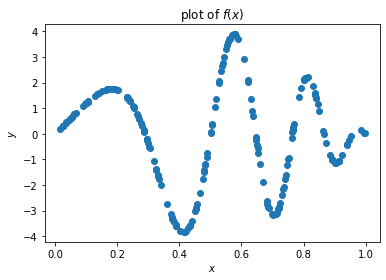

In [77]:
%matplotlib inline

d=1
n=200
X=torch.rand(n,d)
y=4*torch.sin(np.pi*X)*torch.cos(6*np.pi*X**2)

plt.scatter(X.numpy(),y.numpy())
plt.title('plot of $f(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.show()

In [81]:
# use NN to fit the curve
# That's amazing!
d=1
n=200
X=torch.rand(n,d)
y=4*torch.sin(np.pi*X)*torch.cos(6*np.pi*X**2)
step_size=0.05
n_epochs=6000
n_hidden_1=32
n_hidden_2=32
d_out=1

neural_network=nn.Sequential(
                            nn.Linear(d,n_hidden_1),
                            nn.Tanh(),
                            nn.Linear(n_hidden_1,n_hidden_2),
                            nn.Tanh(),
                            nn.Linear(n_hidden_2,d_out)
                            )
loss_func=nn.MSELoss()
optim=torch.optim.SGD(neural_network.parameters(),lr=step_size)
print('iter,\tloss')

for i in range(n_epochs):
    y_hat = neural_network(X)
    loss = loss_func(y_hat, y)#only compute loss on a simple sample
    optim.zero_grad()
    loss.backward()
    optim.step()
    if i%(n_epochs//10)==0:
        print('{},\t{:.2f}'.format(i,loss.item()))


iter,	loss,	w
0,	3.34
600,	2.07
1200,	1.21
1800,	1.00
2400,	0.64
3000,	0.46
3600,	0.38
4200,	0.29
4800,	0.21
5400,	0.15


In [82]:
X_grid=torch.from_numpy(np.linspace(0,1,50)).float().view(-1,d)

In [87]:
y_hat = neural_network(X_grid)

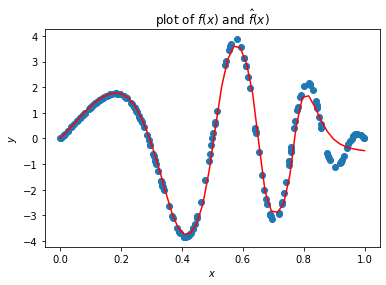

In [89]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(X_grid.detach().numpy(),y_hat.detach().numpy(),'r')
plt.title('plot of $f(x)$ and $\hat{f}(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [90]:
# test on SGD with momentum
# reduce training loss in fewer steps
d=1
n=200
X=torch.rand(n,d)
y=4*torch.sin(np.pi*X)*torch.cos(6*np.pi*X**2)
step_size=0.05
n_epochs=1500
n_hidden_1=32
n_hidden_2=32
d_out=1
momentum=0.9
neural_network=nn.Sequential(
                            nn.Linear(d,n_hidden_1),
                            nn.Tanh(),
                            nn.Linear(n_hidden_1,n_hidden_2),
                            nn.Tanh(),
                            nn.Linear(n_hidden_2,d_out)
                            )
loss_func=nn.MSELoss()
optim=torch.optim.SGD(neural_network.parameters(),lr=step_size,momentum=momentum)
print('iter,\tloss')

for i in range(n_epochs):
    y_hat = neural_network(X)
    loss = loss_func(y_hat, y)#only compute loss on a simple sample
    optim.zero_grad()
    loss.backward()
    optim.step()
    if i%(n_epochs//10)==0:
        print('{},\t{:.2f}'.format(i,loss.item()))


iter,	loss
0,	3.82
150,	2.29
300,	0.51
450,	0.12
600,	0.06
750,	0.04
900,	0.01
1050,	0.00
1200,	0.01
1350,	0.01


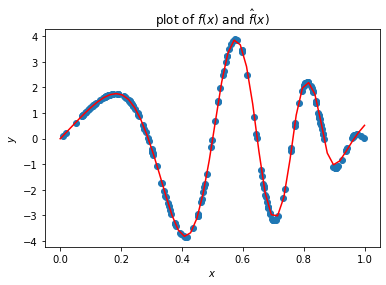

In [91]:
X_grid=torch.from_numpy(np.linspace(0,1,50)).float().view(-1,d)
y_hat = neural_network(X_grid)
plt.scatter(X.numpy(),y.numpy())
plt.plot(X_grid.detach().numpy(),y_hat.detach().numpy(),'r')
plt.title('plot of $f(x)$ and $\hat{f}(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [92]:
loss = nn.CrossEntropyLoss()
in_ = torch.tensor([[-1., 1],[-1, 1],[1, -1]]) 
target = torch.tensor([1, 1, 0])
out_ = loss(in_, target)
print(out_)

tensor(0.1269)


### CNN for inmage

In [93]:
image = np.array([0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.3803922 , 0.37647063, 0.3019608 ,0.46274513, 0.2392157 , 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.3529412 , 0.5411765 , 0.9215687 ,0.9215687 , 0.9215687 , 0.9215687 , 0.9215687 , 0.9215687 ,0.9843138 , 0.9843138 , 0.9725491 , 0.9960785 , 0.9607844 ,0.9215687 , 0.74509805, 0.08235294, 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.54901963,0.9843138 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.7411765 , 0.09019608, 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.8862746 , 0.9960785 , 0.81568635,0.7803922 , 0.7803922 , 0.7803922 , 0.7803922 , 0.54509807,0.2392157 , 0.2392157 , 0.2392157 , 0.2392157 , 0.2392157 ,0.5019608 , 0.8705883 , 0.9960785 , 0.9960785 , 0.7411765 ,0.08235294, 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.14901961, 0.32156864, 0.0509804 , 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.13333334,0.8352942 , 0.9960785 , 0.9960785 , 0.45098042, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.32941177, 0.9960785 ,0.9960785 , 0.9176471 , 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0.32941177, 0.9960785 , 0.9960785 , 0.9176471 ,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.4156863 , 0.6156863 ,0.9960785 , 0.9960785 , 0.95294124, 0.20000002, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0.09803922, 0.45882356, 0.8941177 , 0.8941177 ,0.8941177 , 0.9921569 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.94117653, 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.26666668, 0.4666667 , 0.86274517,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.5568628 ,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.14509805, 0.73333335,0.9921569 , 0.9960785 , 0.9960785 , 0.9960785 , 0.8745099 ,0.8078432 , 0.8078432 , 0.29411766, 0.26666668, 0.8431373 ,0.9960785 , 0.9960785 , 0.45882356, 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.4431373 , 0.8588236 , 0.9960785 , 0.9490197 , 0.89019614,0.45098042, 0.34901962, 0.12156864, 0., 0.,0., 0., 0.7843138 , 0.9960785 , 0.9450981 ,0.16078432, 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.6627451 , 0.9960785 ,0.6901961 , 0.24313727, 0., 0., 0.,0., 0., 0., 0., 0.18823531,0.9058824 , 0.9960785 , 0.9176471 , 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0.07058824, 0.48627454, 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.32941177, 0.9960785 , 0.9960785 ,0.6509804 , 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.54509807, 0.9960785 , 0.9333334 , 0.22352943, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.8235295 , 0.9803922 , 0.9960785 ,0.65882355, 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.9490197 , 0.9960785 , 0.93725497, 0.22352943, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.34901962, 0.9843138 , 0.9450981 ,0.3372549 , 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.01960784,0.8078432 , 0.96470594, 0.6156863 , 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.01568628, 0.45882356, 0.27058825,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.], dtype=np.float32)
image_torch = torch.from_numpy(image).view(1, 1, 28, 28)

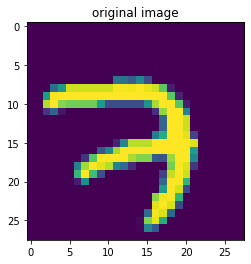

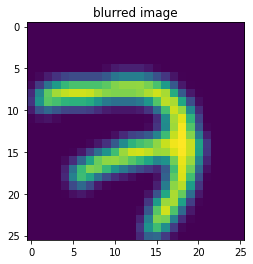

In [94]:
# a gaussian blur kernel
gaussian_kernel = torch.tensor([[1., 2, 1],[2, 4, 2],[1, 2, 1]]) / 16.0

conv = nn.Conv2d(1, 1, 3)
# manually set the conv weight
conv.weight.data[:] = gaussian_kernel

convolved = conv(image_torch)

plt.title('original image')
plt.imshow(image_torch.view(28,28).detach().numpy())
plt.show()

plt.title('blurred image')
plt.imshow(convolved.view(26,26).detach().numpy())
plt.show()

In [95]:
im_channels = 3 # if we are working with RGB images, there are 3 input channels, with black and white, 1
out_channels = 16 # this is a hyperparameter we can tune
kernel_size = 3 # this is another hyperparameter we can tune
batch_size = 4
image_width = 32
image_height = 32

im = torch.randn(batch_size, im_channels, image_width, image_height)

m = nn.Conv2d(im_channels, out_channels, kernel_size)
convolved = m(im) # it is a module so we can call it

print('im shape', im.shape)
print('convolved im shape', convolved.shape)

im shape torch.Size([4, 3, 32, 32])
convolved im shape torch.Size([4, 16, 30, 30])


#### Custom datasets

In [96]:
# can preserve the feature of:
#1.batching data
#2.shuffling data
#3.Load the data in parallel using multiprocessing workers.

from torch.utils.data import Dataset, DataLoader


class FakeDataset(Dataset):

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [99]:
x=np.random.rand(100,10)
y=np.random.rand(100)

dataset=FakeDataset(x,y)
dataloader=DataLoader(dataset,batch_size=4,shuffle=True)
# 4*24组data
for i,d in enumerate(dataloader):
    print(i,d)

0 [tensor([[0.5735, 0.9100, 0.1143, 0.5544, 0.8583, 0.9609, 0.0400, 0.0696, 0.2931,
         0.8838],
        [0.1319, 0.3899, 0.7740, 0.5771, 0.6471, 0.6932, 0.5801, 0.0569, 0.1156,
         0.6165],
        [0.5226, 0.4460, 0.3669, 0.3198, 0.6979, 0.8044, 0.6588, 0.5767, 0.0878,
         0.8397],
        [0.6747, 0.7758, 0.8455, 0.3043, 0.8926, 0.3353, 0.5223, 0.2428, 0.0920,
         0.9607]], dtype=torch.float64), tensor([0.7199, 0.0766, 0.0356, 0.7454])]
1 [tensor([[0.5766, 0.5065, 0.8850, 0.3514, 0.0687, 0.9356, 0.5119, 0.3498, 0.5056,
         0.4237],
        [0.1583, 0.4269, 0.5192, 0.3125, 0.1300, 0.5331, 0.7692, 0.1290, 0.3501,
         0.3902],
        [0.6410, 0.5512, 0.0352, 0.8841, 0.5867, 0.0744, 0.9290, 0.2444, 0.3689,
         0.2700],
        [0.3563, 0.8477, 0.6906, 0.7786, 0.1543, 0.5570, 0.1568, 0.7888, 0.7032,
         0.9995]], dtype=torch.float64), tensor([0.0999, 0.2105, 0.7481, 0.9168])]
2 [tensor([[0.2892, 0.0013, 0.6428, 0.6622, 0.9452, 0.8712, 0.5397, 0.60